<a href="https://colab.research.google.com/github/harshitbhavnani/Machine-Learning/blob/master/Machine%20Learning_Lab4_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python for data visualization**

**Name**: Harshit Bhavnani

**Roll no**: J076

**Lab 4: Experiment 1 & 2** 

**Topics to cover:**

1. Pie charts
2. Box plots
3. Scatter plots
3. Bubble plots
4. Waffle chart
5. Outliers Detection
6. Plotting Maps
7. Interactive Maps & Informative Maps
8. Choropleth Maps

# **Assignment 1:**

1)By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.

2)By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.

3)Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania.

4)Identify countries which are outliers based on total migration.

5)Plot the bubble plot for Norway, Denmark, Finland

# **Assignment 2** - Norway, Denmark and Sweden:
1)Plot scatter plot

2)Bubble plot

3)Boxplot

4)Waffle chart -for India,China,Pakistan

5)Check for outliers in years 2013

6)Plot for mumbai city crimes (markers to map)

7)Immigration to India (Cloropleth maps)

8)PyWaffle

9)Choropleth maps of covid cases total as on date 31|7|2020

In [68]:
import numpy as np # useful for many scientific computing in Python
import pandas as pd # primary data structure library
 
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
 sheet_name='Canada by Citizenship',
 skiprows=range(20),
 skipfooter=2
 )
 
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [69]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [70]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis='columns', inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName': 'Continent', 'RegName': 'Continent-Region', 'DevName':'Development-status'}, inplace=True)

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis='columns')

years = range(1980, 2014)

df_can.head()

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [71]:
#import library

import matplotlib.pyplot as plt
import matplotlib as mpl

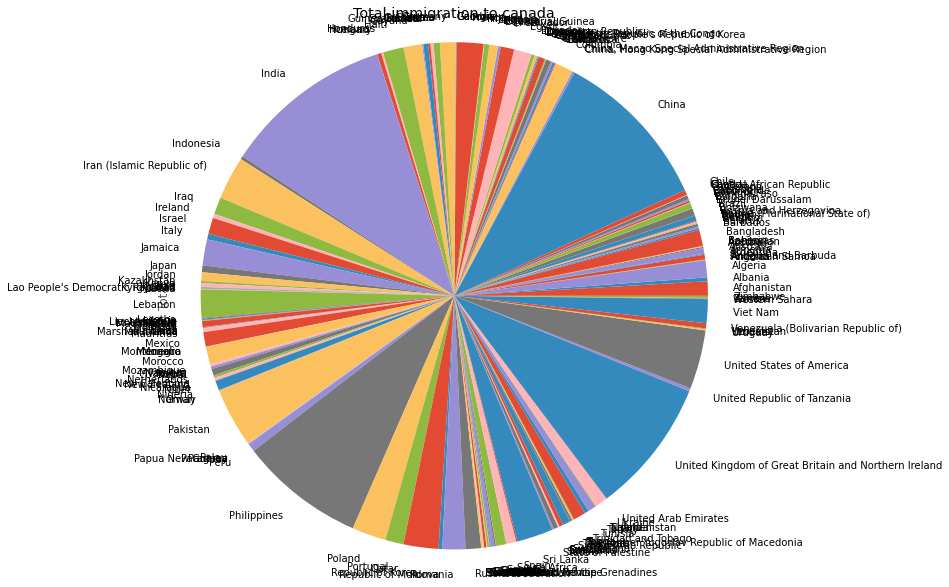

In [72]:
#PIE CHARTS

df_can['Total'].plot(
    kind='pie',
    figsize=(10,10)
)

plt.title('Total immigration to canada')
plt.axis('equal') #pie chart as circle
plt.show()

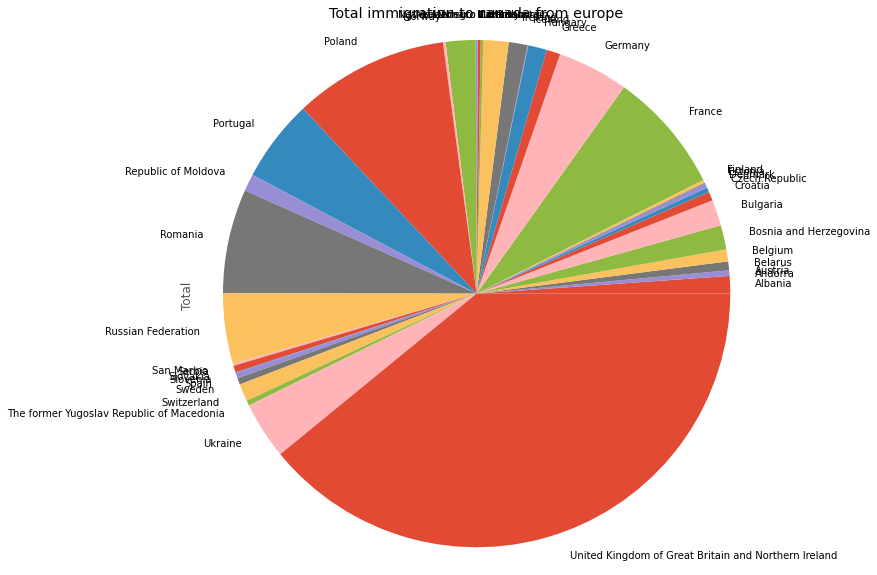

In [73]:
condition = df_can['Continent'] == 'Europe'

dfnew = df_can[(condition)]

dfnew['Total'].plot(
    kind='pie',
    figsize=(10,10)
)

plt.title('Total immigration to canada from europe')
plt.axis('equal') #pie chart as circle
plt.show()


# **Assignment:**

**1)By Continent-region pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.**

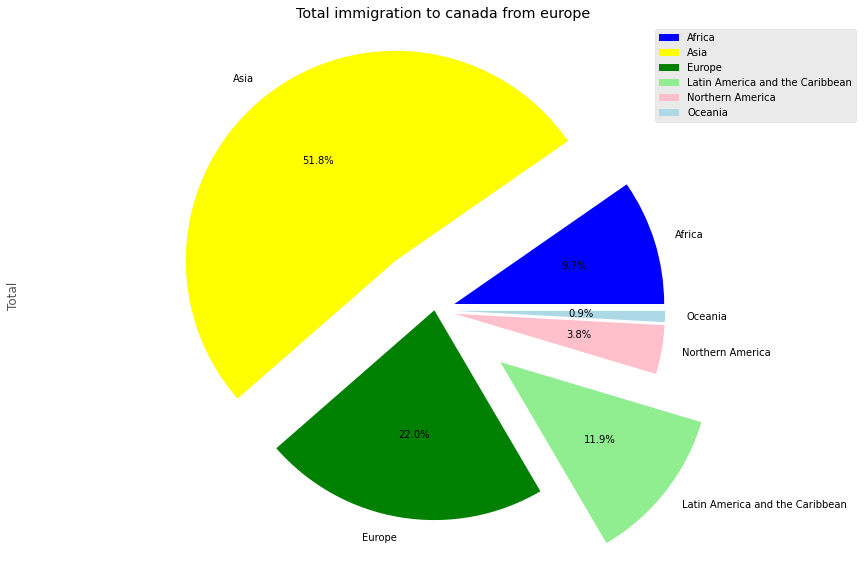

In [74]:
dfnew1=df_can.groupby('Continent',axis='index').sum()

dfnew1.head()

colors=['blue','yellow','green','lightgreen','pink','lightblue']
explodelist=[0.1,0.3,0,0.4,0.1,0.1]

dfnew1['Total'].plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%',
    colors=colors,
    explode=explodelist
)

plt.title('Total immigration to canada from europe')
plt.axis('equal') #pie chart as circle
plt.legend(labels=dfnew1.index, loc='upper right')
plt.show()


# **Assignment**

**2)By Development-status pie-chart use colorlists, explode, pct, figsize, add title, add axes, add legend, remove labels and use shadows.**

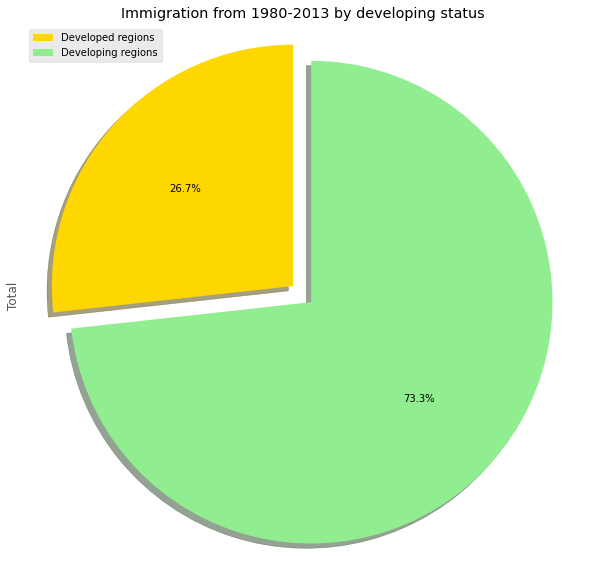

In [75]:
# plot pie chart of dev status 
#All countries of same continent are added up row wise(index)
dfnew1=df_can.groupby('Development-status',axis='index').sum()
dfnew1.head()

colorlist = ['gold', 'lightgreen']
explodelist = [0,0.1]


dfnew1['Total'].plot(
    kind='pie',
    figsize=(10,10),
    startangle=90,
    autopct='%1.1f%%',
    shadow=True,
    labels=None,
    colors=colorlist,
    explode=explodelist
)

plt.title('Immigration from 1980-2013 by developing status')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=dfnew1.index, loc='upper left')
plt.show()

In [76]:
#Box Plot
#min - first quartile - median - third quartile - max
#inter quartile range = third qaurtile-first quartile
#describe()

In [77]:
df_india=df_can.loc['India',years].transpose()
df_india.head()

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
Name: India, dtype: object

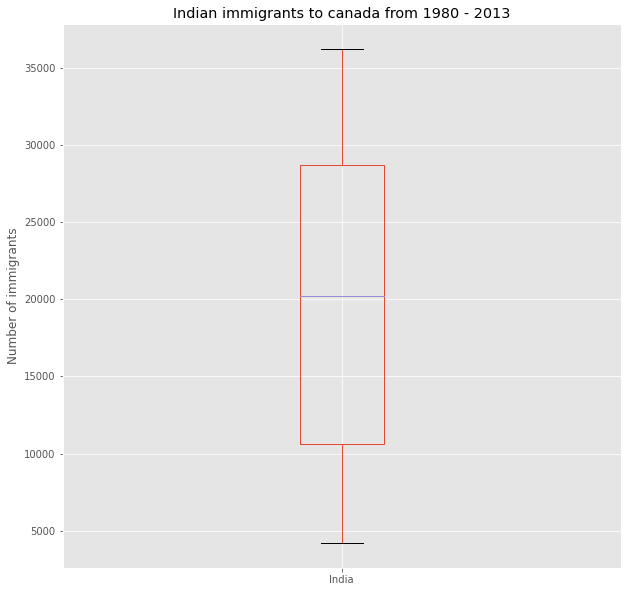

In [78]:
df_india.plot(
    kind='box',

    figsize=(10,10)
)

plt.title("Indian immigrants to canada from 1980 - 2013")
plt.ylabel('Number of immigrants')
plt.show()

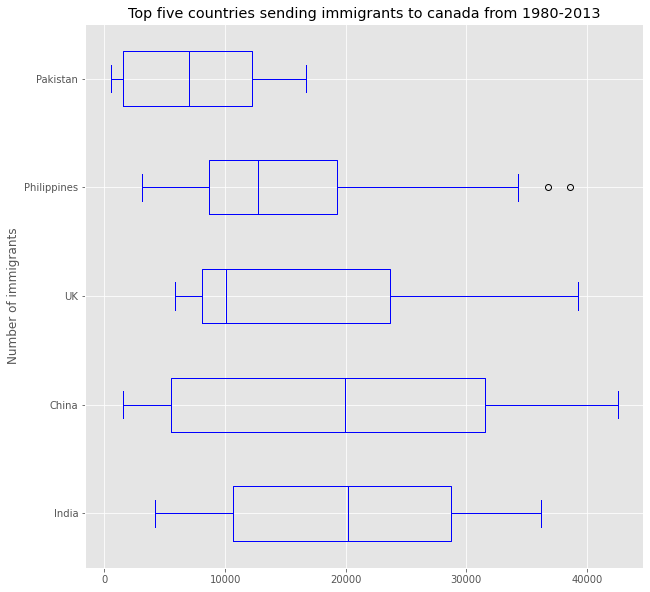

In [79]:
#Top 5

df_can.sort_values(by='Total',axis='index',inplace=True,ascending=False)

dftop5=df_can.head(5)

dftop5=dftop5[years]

dftop5=dftop5.transpose()

dftop5=dftop5.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'})

dftop5.plot(
    kind='box',
    figsize=(10,10),
    color='blue',
    vert=False
)

plt.title("Top five countries sending immigrants to canada from 1980-2013")
plt.ylabel('Number of immigrants')
plt.show()

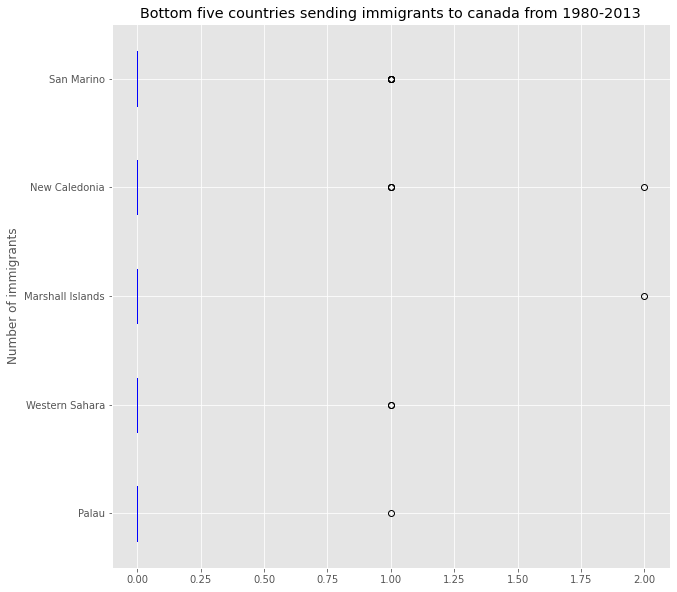

In [80]:
#Bottom 5
df_can.sort_values(by='Total',axis='index',inplace=True,ascending=True)

dfbot5=df_can.head(5)

dfbot5=dfbot5[years]

dfbot5=dfbot5.transpose()

dfbot5.plot(
    kind='box',
    figsize=(10,10),
    color='blue',
    vert=False
)

plt.title("Bottom five countries sending immigrants to canada from 1980-2013")
plt.ylabel('Number of immigrants')
plt.show()

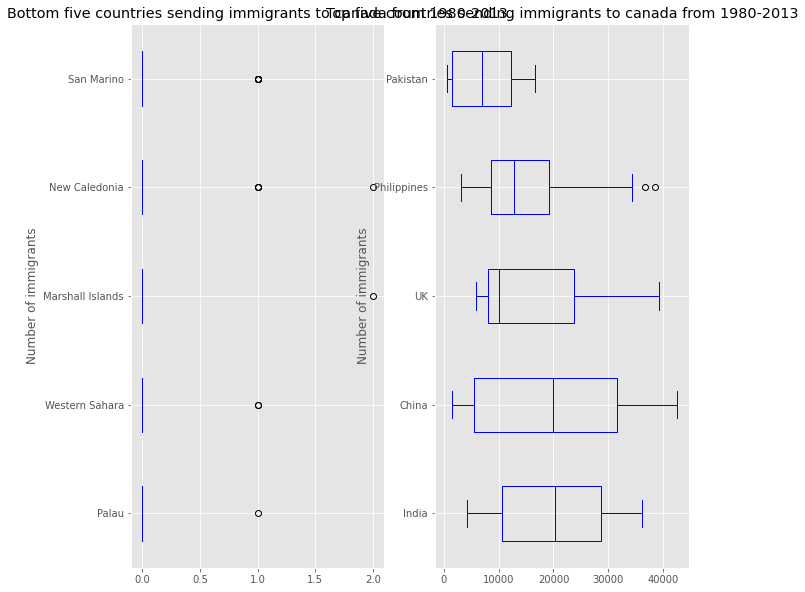

In [81]:
#using subplots

fig=plt.figure()

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

dfbot5.plot(kind='box',figsize=(10,10),color='blue',vert=False,ax=ax1)

ax1.set_title("Bottom five countries sending immigrants to canada from 1980-2013")
ax1.set_ylabel('Number of immigrants')

dftop5.plot(kind='box',figsize=(10,10),color='blue',vert=False,ax=ax2)

ax2.set_title("Top five countries sending immigrants to canada from 1980-2013")
ax2.set_ylabel('Number of immigrants')

plt.show()

Text(0, 0.5, 'Number of immigrants')

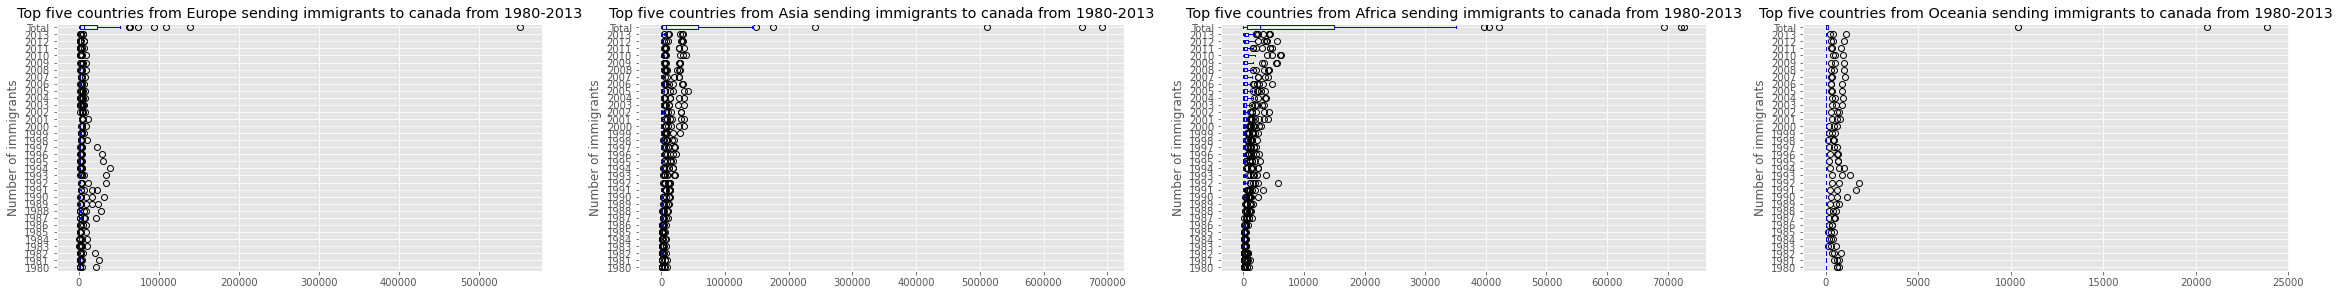

In [82]:
#Create 4 Subplots - to display boxplot of top 5 countries in Europe, Asia, Africa, Oceania
#using subplots

condition1=df_can['Continent']=='Europe'
condition2=df_can['Continent']=='Asia'
condition3=df_can['Continent']=='Africa'
condition4=df_can['Continent']=='Oceania'
 
df_Europe=df_can[(condition1)]
df_Asia=df_can[(condition2)]
df_Africa=df_can[(condition3)]
df_Oceania=df_can[(condition4)]
 
fig = plt.figure()
 
ax1 = fig.add_subplot(2,4,1)
ax2 = fig.add_subplot(2,4,2)
ax3 = fig.add_subplot(2,4,3)
ax4 = fig.add_subplot(2,4,4)
 
df_Europe.plot(kind='box',figsize=(40,10),color='blue',vert=False, ax=ax1)
ax1.set_title("Top five countries from Europe sending immigrants to canada from 1980-2013")
ax1.set_ylabel('Number of immigrants')
 
df_Asia.plot(kind='box',figsize=(40,10),color='blue',vert=False, ax=ax2)
ax2.set_title("Top five countries from Asia sending immigrants to canada from 1980-2013")
ax2.set_ylabel('Number of immigrants')
 
df_Africa.plot(kind='box',figsize=(40,10),color='blue',vert=False, ax=ax3)
ax3.set_title("Top five countries from Africa sending immigrants to canada from 1980-2013")
ax3.set_ylabel('Number of immigrants')
 
df_Oceania.plot(kind='box',figsize=(40,10),color='blue',vert=False, ax=ax4)
ax4.set_title("Top five countries from Oceania sending immigrants to canada from 1980-2013")
ax4.set_ylabel('Number of immigrants')

**Assignment: Norway-Sweden-Denmark**

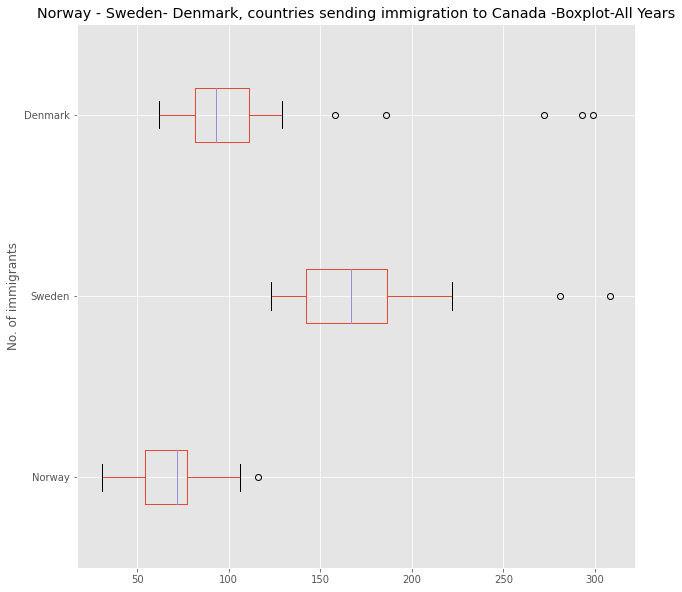

In [83]:
df1=df_can.copy()
df_can.head()

df1.drop(["Continent","Continent-Region","Development-status","Total"], axis='columns',inplace=True)
df1=df1.transpose()
df1.tail()

dfnsd=df1[["Norway","Sweden",'Denmark']]
#dfnsd.tail()
dfnsd.plot(kind='box',figsize=(10,10),vert=False)

plt.title("Norway - Sweden- Denmark, countries sending immigration to Canada -Boxplot-All Years")
plt.ylabel('No. of immigrants')
plt.show()

# **Assignment :**

**3)Create 4 subplots - to display boxplot of top 5 countries in europe, asia, africa, oceania.**

In [84]:
years=range(1980,2014)
condition=df_can['Continent']=='Europe'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)


dtope=dfnew.head(5)
dtope=dtope[years]
dtope=dtope.transpose()
dtope.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)
dtope.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,UK,Poland,France,Romania,Portugal
2009,8876,1013,5051,2076,623
2010,8724,795,4646,1922,629
2011,6204,720,4080,1776,528
2012,6195,779,6280,1588,560
2013,5827,852,5623,1512,630


In [85]:
years=range(1980,2014)
condition=df_can['Continent']=='Asia'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)

dtopa=dfnew.head(5)
dtopa=dtopa[years]
dtopa=dtopa.transpose()
dtopa.rename(columns={'Iran (Islamic Republic of)':'Iran'}, inplace=True)

dtopa.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,India,China,Philippines,Pakistan,Iran
2009,29456,29622,28573,7217,6580
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479
2012,30933,33024,34315,11227,7534
2013,33087,34129,29544,12603,11291


In [86]:
years=range(1980,2014)
condition=df_can['Continent']=='Africa'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)

dtopaf=dfnew.head(5)
dtopaf=dtopaf[years]
dtopaf=dtopaf.transpose()
dtopaf.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,Egypt,Morocco,Algeria,Somalia,South Africa
2009,3496,5532,5393,1214,1188
2010,5982,6242,4752,1528,1238
2011,4663,4399,4325,1535,959
2012,5555,3878,3774,1582,1243
2013,4165,3261,4331,2028,1240


In [87]:
years=range(1980,2014)
condition=df_can['Continent']=='Oceania'
dfnew=df_can[(condition)]

dfnew.sort_values(by="Total",axis='index',inplace=True,ascending=False)

dtopo=dfnew.head(5)
dtopo=dtopo[years]
dtopo=dtopo.transpose()
dtopo.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Country,Australia,Fiji,New Zealand,Tonga,Samoa
2009,1018,311,520,5,2
2010,933,398,490,5,5
2011,851,316,375,2,3
2012,982,270,417,3,2
2013,1121,228,415,5,0


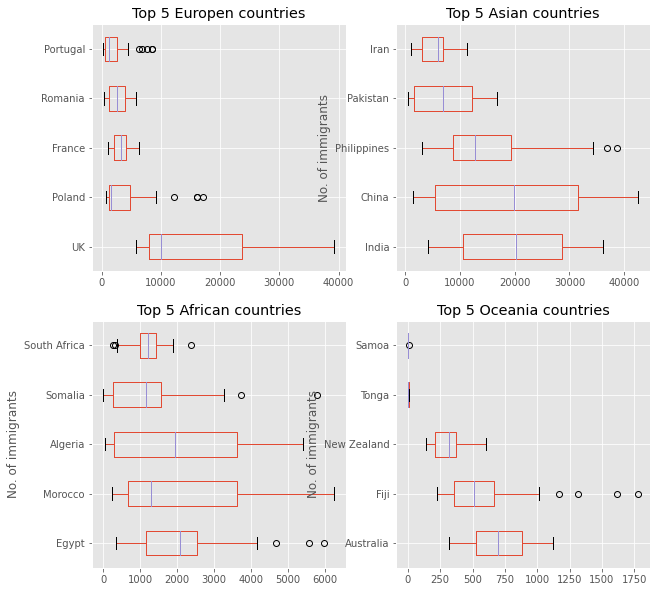

In [88]:
#using subplots

fig=plt.figure()

#Create 2 subplots
ax1=fig.add_subplot(2,2,1)#2 row,2 columsn-1st figure
ax2=fig.add_subplot(2,2,2)#2 row,2 columsn-2nd figure
ax3=fig.add_subplot(2,2,3)#2 row,2 columsn-3rd figure
ax4=fig.add_subplot(2,2,4)#2 row,2 columsn-4th figure

#write whic is ax1 and which is ax2
dtope.plot(kind='box',figsize=(10,10),vert=False,ax=ax1)
ax1.set_title("Top 5 Europen countries")
ax2.set_ylabel('No. of immigrants')

dtopa.plot(kind='box',figsize=(10,10),vert=False,ax=ax2)
ax2.set_title("Top 5 Asian countries")
ax2.set_ylabel('No. of immigrants')

dtopaf.plot(kind='box',figsize=(10,10),vert=False,ax=ax3)
ax3.set_title("Top 5 African countries")
ax3.set_ylabel('No. of immigrants')

dtopo.plot(kind='box',figsize=(10,10),vert=False,ax=ax4)
ax4.set_title("Top 5 Oceania countries")
ax4.set_ylabel('No. of immigrants')

plt.show()

# **Assignment :**

**4) Identify countries which are outliers based on total migration**

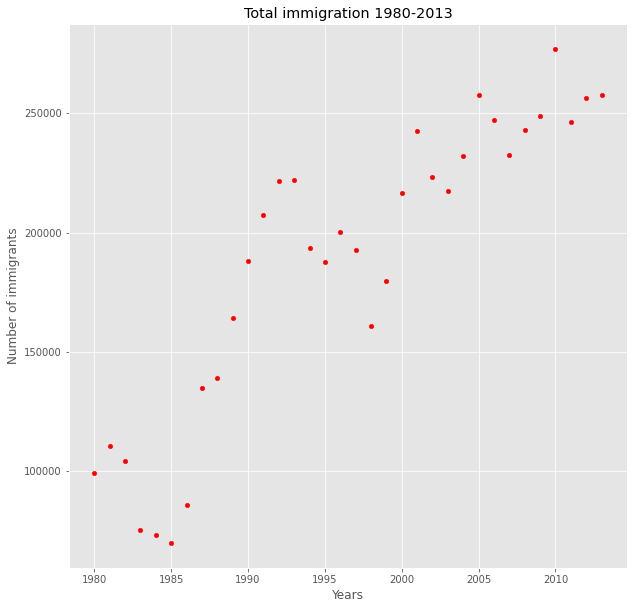

In [89]:
#Create Scatter Plots

dfscat = pd.DataFrame(df_can[years].sum(axis='index'))

dfscat.reset_index(inplace=True)

dfscat.columns=['Year','Total']

dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='red'
)

plt.title("Total immigration 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")
plt.show()

In [90]:
x=dfscat['Year']
y=dfscat['Total']
fit=np.polyfit(x,y,1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

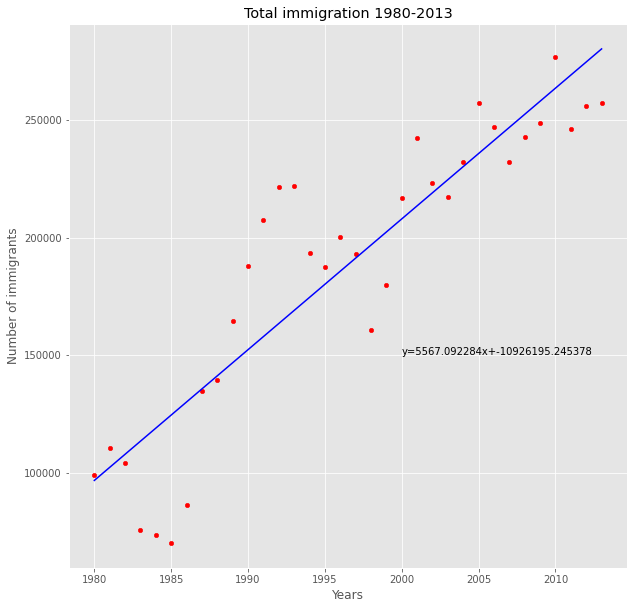

In [91]:
dfscat.plot(
    kind='scatter',
    figsize=(10,10),
    x='Year',
    y='Total',
    color='red'
)

plt.title("Total immigration 1980-2013")
plt.xlabel("Years")
plt.ylabel("Number of immigrants")

plt.plot(x,fit[0]*x+fit[1],color='blue')
plt.annotate('y={0:0f}x+{1:0f}'.format(fit[0],fit[1]),xy=(2000,150000))
plt.show()

In [92]:
#bubble posts

dfnew = df_can[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"India","China"]]
dfnew.tail()

Country,Year,India,China
29,2009,29456,29622
30,2010,34235,30391
31,2011,27509,28502
32,2012,30933,33024
33,2013,33087,34129


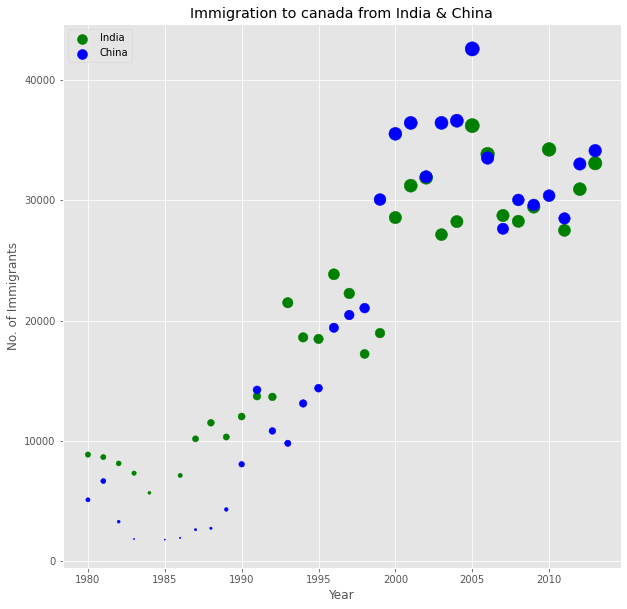

In [93]:
#normalize
#x'=(X-Xmin)/(Xmax-Xmin)

norm_india = (dfnew['India'] - dfnew['India'].min()) / (dfnew['India'].max() - dfnew['India'].min())

norm_china = (dfnew['China'] - dfnew['China'].min()) / (dfnew['China'].max() - dfnew['China'].min())

ax1=dfnew.plot(
    kind="scatter",
    x="Year",
    y="India",
    figsize=(10,10),
    color='green',
    s=norm_india*200
)

ax2=dfnew.plot(
    kind="scatter",
    x="Year",
    y="China",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_china*200
)

ax1.set_title("Immigration to canada from India & China")
ax1.set_ylabel("No. of Immigrants")
ax1.legend(['India','China'], loc='upper left')

# **Assignment :**

**5) Plot the bubble plot for Norway, Denmark, Finland**

In [94]:
dfnew = df_can[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"Denmark","Finland","Norway"]]
dfnew.tail()

Country,Year,Denmark,Finland,Norway
29,2009,81,63,75
30,2010,92,63,46
31,2011,93,72,49
32,2012,94,62,53
33,2013,81,76,59


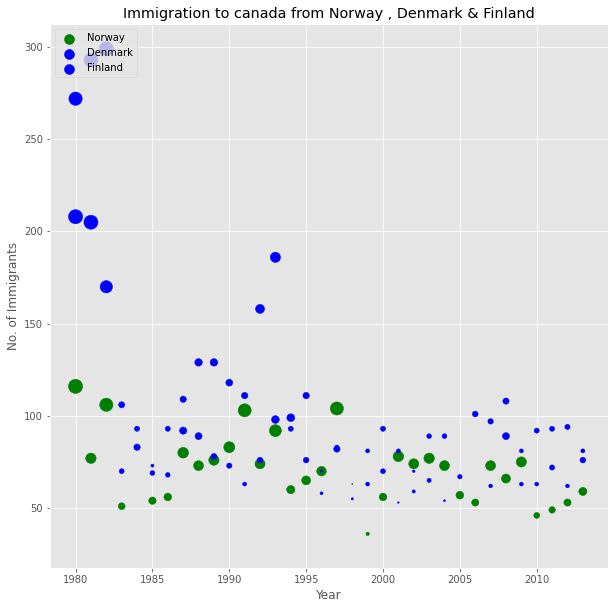

In [95]:

#normalize
#x'=(X-Xmin)/(Xmax-Xmin)

norm_Norway = (dfnew['Norway'] - dfnew['Norway'].min()) / (dfnew['Norway'].max() - dfnew['Norway'].min())
norm_Denamrk = (dfnew['Denmark'] - dfnew['Denmark'].min()) / (dfnew['Denmark'].max() - dfnew['Denmark'].min())
norm_Finland = (dfnew['Finland'] - dfnew['Finland'].min()) / (dfnew['Finland'].max() - dfnew['Finland'].min())

ax1=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Norway",
    figsize=(10,10),
    color='green',
    s=norm_Norway*200
)

ax2=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Denmark",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_Denamrk*200
)

ax3=dfnew.plot(
    kind="scatter",
    x="Year",
    y="Finland",
    figsize=(10,10),
    color='blue',
    ax=ax1,
    s=norm_Finland*200
)

ax1.set_title("Immigration to canada from Norway , Denmark & Finland")
ax1.set_ylabel("No. of Immigrants")
ax1.legend(['Norway','Denmark',"Finland"], loc='upper left')

In [96]:
dfnew = df_can[years].transpose()
dfnew.reset_index(inplace=True)
dfnew.head()
dfnew.rename(columns={'index':'Year'}, inplace=True)
dfnew['Total'] = dfnew.sum(axis='columns')
dfnew=dfnew[['Year',"Brazil","Argentina"]]
dfnew.tail()

Country,Year,Brazil,Argentina
29,2009,2509,467
30,2010,2598,459
31,2011,1508,278
32,2012,1642,263
33,2013,1714,282


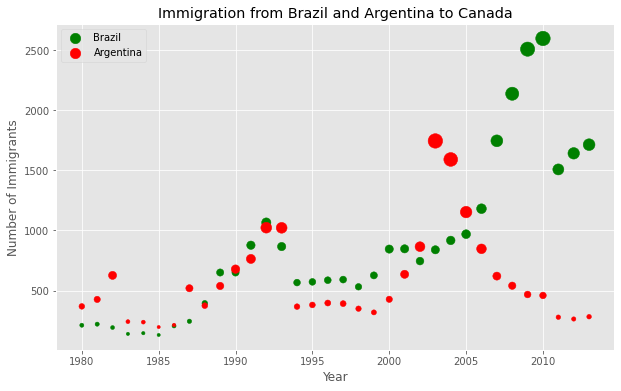

In [97]:
# Plot Scatter and bubble plots for brazil and argentina

#normalize
#x'=(X-Xmin)/(Xmax-Xmin)
 
norm_brazil=(dfnew['Brazil']-dfnew['Brazil'].min())/(dfnew['Brazil'].max()-dfnew['Brazil'].min())
norm_Argentina=(dfnew['Argentina']-dfnew['Argentina'].min())/(dfnew['Argentina'].max()-dfnew['Argentina'].min())
 
# scatter plot and bubble plot
 
ax0 = dfnew.plot(
    kind='scatter',
    x='Year',
    y='Brazil',
    figsize=(10,6),
    color='green',
    s=norm_brazil*200+10
)
 
ax1 = dfnew.plot(
    kind='scatter',
    x='Year',
    y='Argentina',
    figsize=(10,6),
    color='red',
    ax=ax0,
    s=norm_Argentina*200+10
)
 
ax0.set_title('Immigration from Brazil and Argentina to Canada')
ax0.set_ylabel('Number of Immigrants')
ax0.legend(['Brazil','Argentina'],loc='upper left')

# **Waffle Charts**

A waffle chart is an interesting visualization that is normally created to display progress toward goals.

It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

In [98]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.2.2


In [99]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [100]:
dfindopakchina = df_can.loc[['India', 'Pakistan', 'China'], :]

dfindopakchina

,Continent,Continent-Region,Development-status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [101]:
df_dsn = df_can.loc[['India', 'Pakistan', 'China'], :]

categories = df_dsn.index.values

value = df_dsn['Total']

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm

Total number of tiles is 400
India: 174
Pakistan: 61
China: 166


<Figure size 432x288 with 0 Axes>

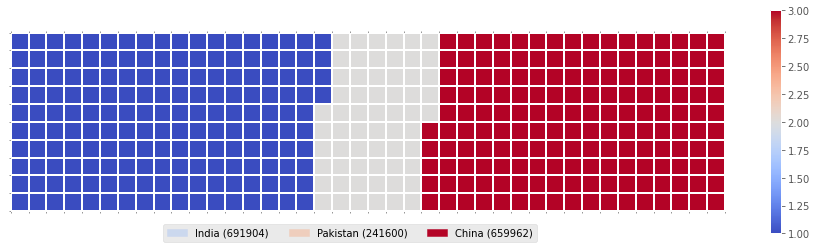

In [102]:
create_waffle_chart(categories, value, height, width, colormap)

# **Assignment**

**Create a Waffle chart with Norway,Sweden,Denamark**

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

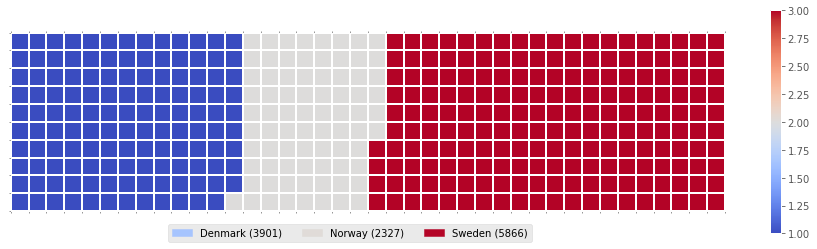

In [103]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

categories = df_dsn.index.values

value = df_dsn['Total']

#create a waffle chart

width=40
height=10

colormap = plt.cm.coolwarm

create_waffle_chart(categories, value, height, width, colormap)


In [104]:
#Word clouds

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes 

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

# download file and save as alice_novel.txt
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

/bin/bash: conda: command not found
Wordcloud is installed and imported!
File downloaded and saved!


<function matplotlib.pyplot.show>

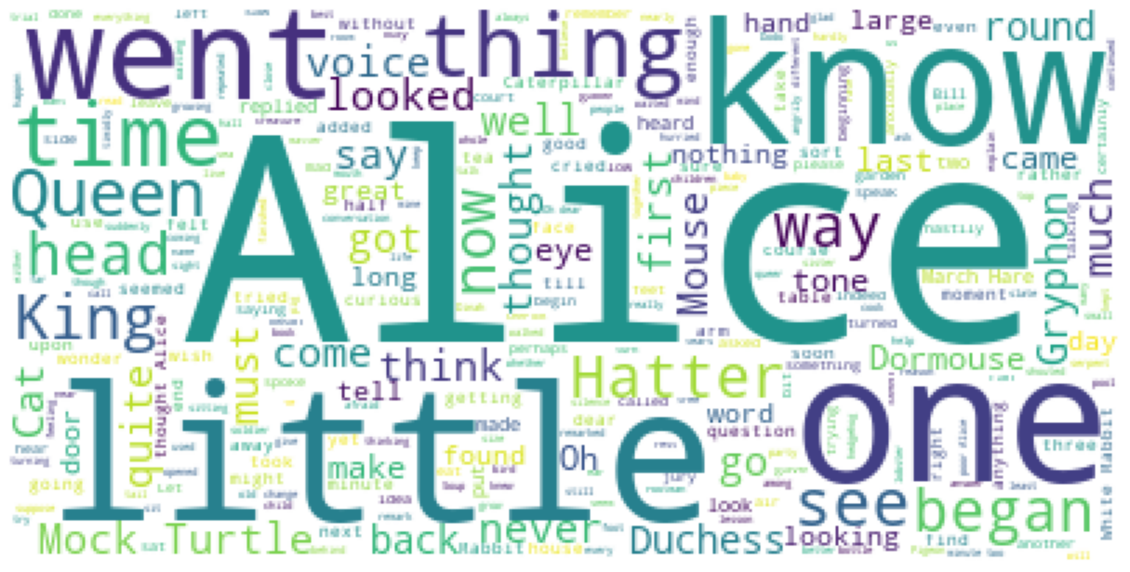

In [105]:
#step1 - preprocessing

stopwordsrem=set(STOPWORDS)
stopwordsrem.add('said')

#step2 - worldcloud object

alicewc=WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwordsrem
)

#step 3 - use the object to call function

alicewc.generate(alice_novel)

#step 4 - display

fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
plt.imshow(alicewc)
plt.axis('off')
plt.show

# **Maps**

In [106]:
import numpy as np

import pandas as pd

import folium

In [107]:
map1 = folium.Map()
map1

In [108]:
map2 = folium.Map(location=[37.22, -122.16],zoom_start=12)
map2

In [109]:
map3=folium.Map(location=[56.130,-106.35],zoom_start=10,tiles='Stamen Toner')
map3

In [110]:
map4=folium.Map(location=[56.130,-106.35],zoom_start=5,tiles='Stamen Terrain')
map3

**Find coordinates of Mumbai and plot on map**

In [111]:
map6 = folium.Map(location=[19.0760, 72.8777],zoom_start=12)
map6

In [112]:
df_incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

df_incidents.head()

df_incidents.shape

Dataset downloaded and read into a pandas dataframe!


(150500, 13)

# **Markers on Maps**

In [113]:
#step1 - obtain dataset
df1 = df_incidents.iloc[0:100,:]

#step 2 - map
lat = 37.77
longs = -122.42

map1 = folium.Map(location=[lat, longs], zoom_start=12)


for lat, longs, labels in zip(df1.Y, df1.X, df1.Category):
  folium.CircleMarker(
      [lat, longs],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6
  ).add_to(map1)

map1

In [114]:
#step1 - obtain dataset
df1 = df_incidents.iloc[0:100,:]

#step 2 - map
lat = 37.77
longs = -122.42

map1 = folium.Map(location=[lat, longs], zoom_start=12)

#cluster
from folium import plugins
clust = plugins.MarkerCluster().add_to(map1)


for lat, longs, labels in zip(df1.Y, df1.X, df1.Category):
  folium.CircleMarker(
      [lat, longs],
      radius=5,
      color='yellow',
      fill=True,
      popup=labels,
      fill_color='blue',
      fill_opacity=0.6
  ).add_to(clust)

map1

# **Chloropleth Map**

In [115]:
df_can.reset_index(inplace=True)

In [116]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [117]:
worldmap = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Watercolor')
worldmap

world_geo = r'world_countries.json'

worldmap.choropleth(
    geo_data = world_geo,
    data=df_can,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    legend='Immigration to Canada',
    fill_color='YlOrRd'
 )

worldmap

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [118]:
worldmap = folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Watercolor')
worldmap

world_geo = r'world_countries.json'


scale = np.linspace(df_can['Total'].min(), df_can['Total'].max(), 6, dtype=int)
scale = scale.tolist()
scale[-1] = scale[-1]+1

worldmap.choropleth(
    geo_data = world_geo,
    data=df_can,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    legend='Immigration to Canada',
    fill_color='YlOrRd',
    threshold_scale=scale
 )

worldmap

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
